In [ ]:
import pandas as pd
import numpy as np
import os
from PIL import Image
import random
import math
import matplotlib.pyplot as plt

In [ ]:

image1 = Image.open('1.gif')
#image1 = image1.resize((512, 512))
array1 = np.array(image1)

array([[ 9,  9,  6, ...,  9,  9,  9],
       [ 9, 10,  9, ..., 12,  9,  9],
       [ 9, 11,  7, ..., 10,  8,  8],
       ...,
       [ 7,  6,  6, ...,  6,  7,  5],
       [ 8,  7,  8, ...,  6,  7,  5],
       [ 9, 10, 10, ...,  6,  6,  5]], dtype=uint8)

In [ ]:
image2 = Image.open('2.gif')
image2 = image2.resize((512, 512))
array2 = np.array(image2)

array([[11, 11,  9, ..., 11, 12, 12],
       [10, 11, 11, ..., 14, 12, 12],
       [10, 11, 10, ..., 12, 11, 12],
       ...,
       [ 9,  8,  7, ...,  6,  7,  7],
       [ 9,  8,  9, ...,  7,  7,  6],
       [10, 11, 12, ...,  6,  7,  6]], dtype=uint8)

In [ ]:
image3 = Image.open('3.gif')
image3 = image3.resize((512, 512))
array3 = np.array(image3)

[[12 15 12 ... 13 13 14]
 [12 13 14 ... 16 18 14]
 [12 12 13 ... 17 18 14]
 ...
 [ 9  9  7 ...  6  5  7]
 [10 11 10 ...  6  5  7]
 [11 15 15 ...  6  5  6]]


In [ ]:
image4 = Image.open('4.gif')
image4 = image4.resize((512, 512))
array4 = np.array(image4)


[[28 27 26 ... 18 19 19]
 [29 29 28 ... 19 19 19]
 [29 29 27 ... 21 19 19]
 ...
 [19 17 19 ...  8 13 10]
 [23 19 21 ...  9 17  8]
 [25 24 24 ... 11 17  8]]


In [ ]:
accuracy =[]
K_values= []

In [ ]:
centroids = []
# rx_cor = random.randint(0,100)
# ry_cor = random.randint(101,200)
# nrx_cor = random.randint(201,300)
# nry_cor = random.randint(301,512)
# centroids.append([rx_cor,ry_cor])
# centroids.append([nrx_cor,nry_cor])
centroids.append([19,154])
centroids.append([24,41])
NEW_Rcentroid = [600,600]
NEW_NRcentroid =[600,600]


result_matrix = np.zeros((512,512))
print("R - ",centroids[0],"NR - ",centroids[1])


K = 3
P=K
while(P):
  river_pts=[]
  nonriver_pts=[]
  for i in range(512):
    for j in range(512):
      x = centroids[0][0]
      y = centroids[0][1]
      distR = math.sqrt(((array1[x][y]) - array1[i][j])**2 + (array2[x][y] - array2[i][j])**2 + (array3[x][y] - array3[i][j])**2 + (array4[x][y] - array4[i][j])**2 )
      x = centroids[1][0]
      y = centroids[1][1]
      distNR = math.sqrt((array1[x][y] - array1[i][j])**2 + (array2[x][y] - array2[i][j])**2 + (array3[x][y] - array3[i][j])**2 + (array4[x][y] - array4[i][j])**2 )
      if distR > distNR:
        result_matrix[i][j]=0
        nonriver_pts.append([i,j])
      else:
         result_matrix[i][j]=1
         river_pts.append([i,j])

  NEW_Rcentroid[0] = int(sum([river_pts[k][0] for k in range(len(river_pts))])/len(river_pts))
  NEW_Rcentroid[1] = int(sum([river_pts[k][1] for k in range(len(river_pts))])/len(river_pts))
  NEW_NRcentroid[0] = int(sum([nonriver_pts[k][0] for k in range(len(nonriver_pts))])/len(nonriver_pts))
  NEW_NRcentroid[1] = int(sum([nonriver_pts[k][1] for k in range(len(nonriver_pts))])/len(nonriver_pts))
  print(NEW_Rcentroid,NEW_NRcentroid)
  if(NEW_Rcentroid == centroids[0] and NEW_NRcentroid == centroids[1]):
      break
  centroids.clear()
  centroids.append(NEW_Rcentroid)
  centroids.append(NEW_NRcentroid)
  NEW_Rcentroid = [600,600]
  NEW_NRcentroid = [600,600]
  P -= 1


R -  [19, 154] NR -  [24, 41]


<ipython-input-45-d4cd99227dd8>:27: RuntimeWarning: overflow encountered in ubyte_scalars
  distR = math.sqrt(((array1[x][y]) - array1[i][j])**2 + (array2[x][y] - array2[i][j])**2 + (array3[x][y] - array3[i][j])**2 + (array4[x][y] - array4[i][j])**2 )
<ipython-input-45-d4cd99227dd8>:30: RuntimeWarning: overflow encountered in ubyte_scalars
  distNR = math.sqrt((array1[x][y] - array1[i][j])**2 + (array2[x][y] - array2[i][j])**2 + (array3[x][y] - array3[i][j])**2 + (array4[x][y] - array4[i][j])**2 )


[252, 252] [293, 293]
[249, 242] [258, 262]
[254, 248] [257, 266]


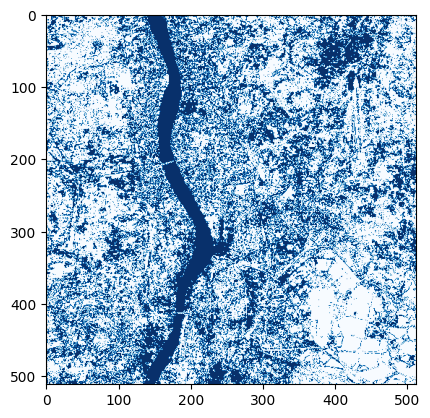

In [ ]:
plt.imshow(result_matrix, cmap='Blues')

In [ ]:
river_points = pd.read_excel('data_river.xlsx',header=None)
np.resize(river_points,(2,50))
river_points = river_points.transpose()
river_points.rename(columns={river_points.columns[0]: 'x',river_points.columns[1]: 'y'},inplace=True)
l1=[1 for i in range(len(river_points['x']))]
river_points['case']=l1

In [ ]:
nonriver_points = pd.read_excel('data_nonriver.xlsx',header=None)
np.resize(nonriver_points,(2,50))
nonriver_points = nonriver_points.transpose()
nonriver_points.rename(columns={nonriver_points.columns[0]: 'x',nonriver_points.columns[1]: 'y'},inplace=True)
l0=[0 for i in range(len(nonriver_points['x']))]
nonriver_points['case']=l0


In [ ]:
river_points = np.array(river_points)
nonriver_points = np.array(nonriver_points)
result = np.concatenate((nonriver_points, river_points))

array([[ 25,  42,   0],
       [ 90,  36,   0],
       [113,  68,   0],
       [143,  89,   0],
       [153,  40,   0],
       [157,  10,   0],
       [193,   9,   0],
       [223,  16,   0],
       [269,  17,   0],
       [312,  16,   0],
       [354,  16,   0],
       [383,  29,   0],
       [407,  17,   0],
       [437,  12,   0],
       [467,  21,   0],
       [496,  16,   0],
       [505,  50,   0],
       [506,  84,   0],
       [463,  85,   0],
       [403, 116,   0],
       [365, 114,   0],
       [323, 105,   0],
       [284, 104,   0],
       [239, 104,   0],
       [207, 100,   0],
       [162,  99,   0],
       [136, 101,   0],
       [ 95,  94,   0],
       [ 42,  94,   0],
       [ 16,  99,   0],
       [  9,  76,   0],
       [  7,  41,   0],
       [223,  43,   0],
       [293,  54,   0],
       [319,  89,   0],
       [325,  62,   0],
       [ 11, 231,   0],
       [  7, 327,   0],
       [  7, 401,   0],
       [  6, 487,   0],
       [ 36, 213,   0],
       [ 34, 281

In [ ]:
count=0
for i in range(150):
  x,y,cs = result[i][:3]
  if(result_matrix[x][y]==cs):
    count+=1
print(count/150*100,"accurate")
accuracy.append(count/150*100)
K_values.append(K)

82.0 accurate


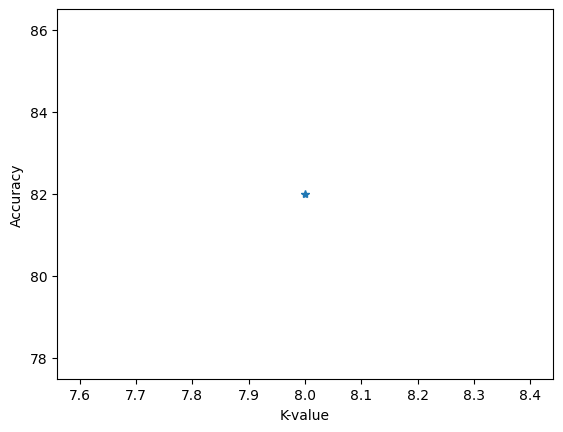

In [ ]:
xpoints = np.array(K_values)
ypoints = np.array(accuracy)
plt.plot(xpoints, ypoints,'*')
plt.plot(xpoints, ypoints)
plt.xlabel('K-value')
plt.ylabel('Accuracy')
plt.show()